# **Trabajo Parcial: Recorrido de un taxi para el recojo de un pasajero**
  <h2>Universidad Nacional de Ingenieria</h2>
  <h2>Maestría en Inteligencia Artificial</h2>
  <h3>Curso: MIA-204 Aprendizaje por Reforzamiento</h3>


  <p><strong>Integrantes:</strong></p>
  <ul style="list-style: none; padding: 0; margin: 0;">
    <li>1. Yan Franco Calderón Félix</li>
    <li>2. Julio Cesar Talaverano García</li>
    <li>3. Omar Eduardo Parihuana Travezaño</li>
    <li>4. William Milner Hanco Mamani</li>
    <li>5. Hilber Alexander Cieza Delgado</li>
  </ul>




## 1. Descripcion del tema propuesto: Recorrido de un taxi para el recojo de pasajero usando Q-Learnig
El tema a resolver en nuestro trabajo se basa en un entorno simulado de un mundo grilla de 5x5, donde se establecen cuatro zonas de color rojo, verde, amarillo y azul, las cuales estan designadas para recoger y dejar pasajeros.

El taxi inicia su recorrido desde una posición aleatoria de la grilla, mientras que el pasajero espera en una de estas 4 zonas mencionadas.

El propósito principal es dirigir el taxi hacia la ubicación del pasajero, recogerlo y finalmente transportarlo hasta su destino deseado y dejarlo allí.

El episodio concluye exitosamente una vez que el pasajero es dejado en su destino.

Durante este proceso, se otorgan recompensas positivas cuando el pasajero es dejado correctamente en su destino y se imponen recompensas negativas por intentos fallidos de recoger o dejar al pasajero en lugares no designados.



---



1. Procedemos a instalar las librerias para configura un entorno virtual para ejecutar aplicaciones gráficas

In [1]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb
!python -m pip install pygame

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common
The following NEW packages will be installed:
  libxfont2 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 7 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,728 kB of archives.
After this operation, 11.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-encodings all 1:1.0.5-0ubuntu2 [578 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-utils amd64 1:7.7+6build2 [94.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 xfonts-base a



---



2. inicializams el entorno virtual para simular y visualizar el dezplamiento del taxi, para ellos utilizaremos la bibliotecas Gym, numpy para operaciones numéricas, matplotlib para graficos y pyvirtualdisplay para crear una pantalla virtual
Del mismo modo configuramos "Taxi-v3"  para iniciar la simulación.

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import time
from time import sleep
import random
from IPython.display import clear_output

env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
help(env)

Help on OrderEnforcing in module gym.wrappers.order_enforcing object:

class OrderEnforcing(gym.core.Wrapper)
 |  OrderEnforcing(env: gym.core.Env, disable_render_order_enforcing: bool = False)
 |  
 |  A wrapper that will produce an error if :meth:`step` is called before an initial :meth:`reset`.
 |  
 |  Example:
 |      >>> from gym.envs.classic_control import CartPoleEnv
 |      >>> env = CartPoleEnv()
 |      >>> env = OrderEnforcing(env)
 |      >>> env.step(0)
 |      ResetNeeded: Cannot call env.step() before calling env.reset()
 |      >>> env.render()
 |      ResetNeeded: Cannot call env.render() before calling env.reset()
 |      >>> env.reset()
 |      >>> env.render()
 |      >>> env.step(0)
 |  
 |  Method resolution order:
 |      OrderEnforcing
 |      gym.core.Wrapper
 |      gym.core.Env
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env: gym.core.Env, disable_render_order_enforcing: bool = False)
 |      A wrappe



---



**3.** A continuación se inician un servidor de pantalla virtual usando pyvirtualdisplay, configurado para ser invisible y con un tamaño de 400x400 píxeles. lo que nos permitirá ejecutar y visualizar graficamente

In [4]:
display = Display(visible=0, size=(400, 400))
display.start()



---



**4.** Seguidamente el siguiente código, ejecuta una simulación en el entorno del juego "Taxi-v3" proporcionado por la libreria Gym.

 Inicialmente, reinicia el entorno y muestra el estado inicial usando gráficos. Luego, realiza un bucle de 20 iteraciones donde en cada paso se selecciona una acción al azar.

 Si el entorno indica que la tarea ha sido completada (done es verdadero), se detiene el bucle. Al final, limpia la pantalla y cierra el entorno.

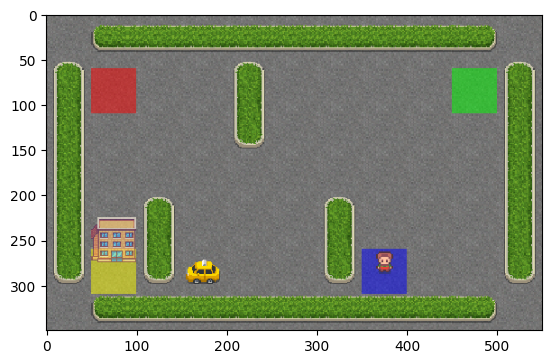

In [5]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(20):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  time.sleep(1.5)
  if done:
      break
ipythondisplay.clear_output(wait=True)
env.close()




---



## 2. Modelado del Problema
### Espacio de Acciones:
El espacio de acciones del agente es discreto y se definen a continuación:
- Moverse al sur.
- Moverse al norte.
- Moverse al este.
- Moverse al oeste.
- Recoger al pasajero.
- Dejar al pasajero.

`env.action_space` muestra las posibles acciones que el agente (taxi) puede realizar en el entorno.
El código `print("Action Space {}".format(env.action_space))` imprime el número total de acciones distintas que el taxi puede realizar.

### Espacio de Estados:
El entorno tiene 500 estados discretos posibles, representados por combinaciones de:
- Posición del taxi: 25 ubicaciones posibles $5 \times 5$ en la cuadrícula.
- Ubicación del pasajero: 5 posibilidades (4 ubicaciones fijas o dentro del taxi).
- Destino del pasajero: 4 ubicaciones fijas.

`env.observation_space` indica todos los posibles estados en los que puede encontrarse el entorno. El código `print("State Space {}".format(env.observation_space))` imprime la descripción de todos los estados posibles que el entorno puede alcanzar durante la simulación.

### Comportamiento del Entorno:
- Es determinista, lo que significa que la misma acción en un estado dado siempre producirá el mismo resultado.
- No hay oponente directo; el reto está en navegar eficientemente, recogiendo y dejando al pasajero para maximizar las recompensas y minimizar las penalizaciones.


5. Las siguintes dos líneas de código se utilizan para imprimir la información sobre el **espacio de acciones** y el **espacio de estados** del entorno Taxi-v3 de  Gym.


In [6]:
print("Action Space {}".format(env.action_space)) # Espacio de acciones
print("State Space {}".format(env.observation_space)) # Espacio de estados



Action Space Discrete(6)
State Space Discrete(500)




---



6. Seguidamente procedemos a ejecutar una simulación en el entorno de Taxi-v3 de Gym y la captura cada paso en una secuencia de "frames" para su posterior visualización:

  **Inicialización**: Se crea una lista vacía frames para almacenar el estado del juego en cada paso y se establece done = False para indicar que el juego aún no ha terminado.

  **Bucle While**: Se ejecuta mientras done no sea True. En cada iteración del bucle:

  Luego se simula el entorno seleccionando acciones al azar que se aplican mediante env.step(action). Este método actualiza el entorno y devuelve el nuevo estado, la recompensa, y si el juego ha concluido. Cada paso se visualiza y almacena en frames, incluyendo la representación del estado, la acción y la recompensa.
  La función print_frames recorre estos frames, mostrando y actualizando la visualización del entorno en cada paso, pausando brevemente para permitir el seguimiento del progreso.

  **Ejecución de print_frames:** Finalmente, con la función print_frames se mostra la secuencia completa de acciones y estados por los que pasó el entorno durante la simulación.

  ---

  El gráfico mostrado al ejecutar el código representa una salida visual del entorno Taxi-v3 de  Gym, en modo texto.

  A continuacion explicamos los elementos que conforman el gráfico:
  
  Las barras verticales **"|"** y los guiones **"-"** forman un cuadro que delimita el área de juego, que es la cuadrícula donde opera el taxi.
  La letra **"R"** en la parte superior indica la ubicación de uno de los posibles destinos o puntos de interés dentro de la cuadrícula, en este caso, simbolizando una de las locaciones específicas para recoger o dejar a un pasajero.
  Dentro del cuadro, los **":"** simboliza espacios vacíos.
  El taxi está representado por el carácter **"Y"** y su ubicación actual es mostrada dentro de la cuadrícula.

  Esta representación nos ayuda a visualizar la posición y los movimientos del taxi dentro del entorno del juego



In [7]:
#from IPython.display import clear_output
#from time import sleep
frames = []
done = False
while not done:
  action = env.action_space.sample()
  state, reward, done , info = env.step(action)

  frames.append({
    'frame': env.render(mode='ansi'),
    'state': state,
    'action': action,
    'reward': reward
    }
  )

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 6539
State: 410
Action: 5
Reward: 20




---



## Solución: Método Utilizado
**7.** La siguiente línea de código **"q_table = np.zeros((env.observation_space.n, env.action_space.n))"**, crea una tabla de Q-valores inicializada con ceros para Q-Learning, Algoritmo que hemos seleccionado para el presente trabajo.

In [8]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))



---




8. La siguientes lineas de código muestran los parámetros utilizados por nuestro algoritmo Q-Learning:

Donde, inicialmemte estamos considerando estos siguientes parametros:

- alpha (0.5): Indica la tasa de aprendizaje que determina la medida en que el valor Q actualizado reemplaza el valor anterior.

- gamma (0.9): Muestra el factor de descuento que equilibra la importancia de las recompensas inmediatas frente a las futuras

- epsilon (1): Indica la probabilidad de seleccionar una acción al azar, inicialmente establecida en 1 para exploración máxima.

- epsilon_decay (0.0001): Muestra la tasa de decaimiento de epsilon para reducir la exploración a medida que el agente aprende más sobre el entorno.

- min_epsilon (0.01): Indica el valor mínimo que puede alcanzar epsilon, asegurando que siempre haya algo de exploración.

- num_episodes (4000): Indica el número total de episodios de entrenamiento.

- max_steps (100): Indica el número máximo de pasos permitidos por episodio.

In [9]:
# Valor Actual
#=============
alpha = 0.5
gamma = 0.9
epsilon = 1
epsilon_decay = 0.0001
min_epsilon = 0.01
num_episodes = 4000
max_steps = 100

In [10]:
# Definimos una lista de diccionarios donde cada diccionario contiene una configuración completa
configx = [
    {
        "name" : 1,
        "alpha": 0.5,
        "gamma": 0.9,
        "epsilon": 1.0,
        "epsilon_decay": 0.0001,
        "min_epsilon": 0.01,
        "num_episodes": 4000,
        "max_steps": 100
    },
    {
        "name": 2,
        "alpha": 0.5,
        "gamma": 0.95,
        "epsilon": 0.9,
        "epsilon_decay": 0.99,
        "min_epsilon": 0.02,
        "num_episodes": 1000,
        "max_steps": 100
    },
    {
        "name": 3,
        "alpha": 0.05,
        "gamma": 0.85,
        "epsilon": 0.8,
        "epsilon_decay": 0.985,
        "min_epsilon": 0.005,
        "num_episodes": 3000,
        "max_steps": 80
    },
    {
        "name": 4,
        "alpha": 0.15,
        "gamma": 0.8,
        "epsilon": 0.7,
        "epsilon_decay": 0.98,
        "min_epsilon": 0.015,
        "num_episodes": 4000,
        "max_steps": 70
    },
    {
        "name": 5,
        "alpha": 0.01,
        "gamma": 0.075,
        "epsilon": 0.6,
        "epsilon_decay": 0.975,
        "min_epsilon": 0.025,
        "num_episodes": 4000,
        "max_steps": 60
    }
    ,
    {
        "name": 6,
        "alpha": 0.005,
        "gamma": 0.075,
        "epsilon": 0.90,
        "epsilon_decay": 0.95,
        "min_epsilon": 0.025,
        "num_episodes": 4000,
        "max_steps": 60
    }
]


### Entrenamiento y Resultados
10. **Implemetando Q-Learnig**

El código implementa el entrenamiento de un agente utilizando Q-Learning en un entorno simulado. Durante cada episodio, el agente decide si explora (elige acciones al azar) o explota (elige la mejor acción según la tabla Q) basado en la probabilidad epsilon. Luego, actualiza la tabla Q con las recompensas obtenidas y ajusta epsilon con el tiempo para reducir la exploración. Se registran las recompensas acumuladas por episodio y se visualiza el progreso del entrenamiento mediante un gráfico de recompensas acumuladas. Al final del entrenamiento, se imprime un resumen del progreso y se muestra una gráfica de las recompensas acumuladas por cada 100 episodios.

También, a continuación el codigo permite la ejecución de diferentes configuraciones de hiperparámetros para evaluar la mejor.

Finalmente, al ejecutar el codigo tendremos un gráfico que muestra la evolución de las recompensas acumuladas por episodio durante el entrenamiento, usando un total de 4000 episodios.
Este tipo de gráficos nos permite  evaluar cómo los ajustes en la política del agente y los parámetros del algoritmo afectan su capacidad de aprender y actuar de manera efectiva.




Config: 6, Episode: 4000


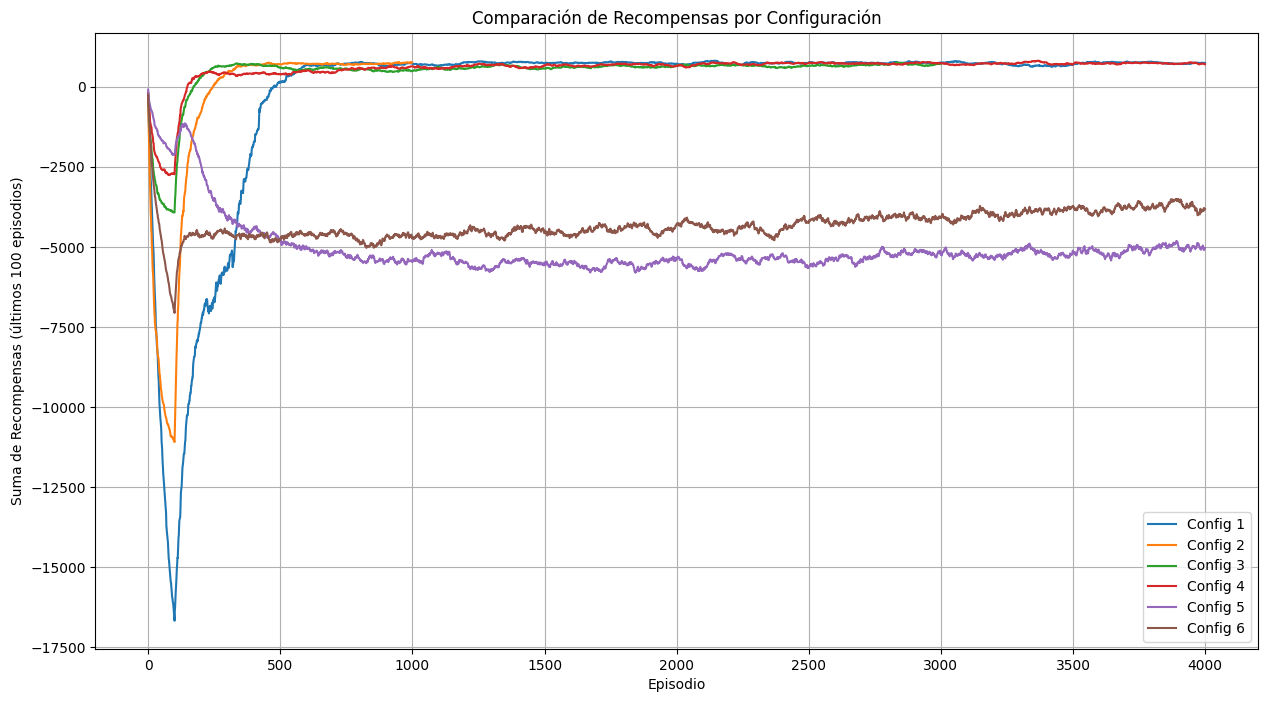


Estadísticas finales:

1:
Recompensa promedio final (últimos 100 episodios): 7.30
Recompensa máxima: 15.00
Recompensa mínima: -415.00

2:
Recompensa promedio final (últimos 100 episodios): 7.54
Recompensa máxima: 15.00
Recompensa mínima: -451.00

3:
Recompensa promedio final (últimos 100 episodios): 7.02
Recompensa máxima: 15.00
Recompensa mínima: -233.00

4:
Recompensa promedio final (últimos 100 episodios): 6.95
Recompensa máxima: 15.00
Recompensa mínima: -207.00

5:
Recompensa promedio final (últimos 100 episodios): -49.76
Recompensa máxima: 12.00
Recompensa mínima: -131.00

6:
Recompensa promedio final (últimos 100 episodios): -38.07
Recompensa máxima: 13.00
Recompensa mínima: -258.00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

results = {}  # Diccionario para almacenar resultados de cada configuración

def run_training(config):
    """Ejecuta el entrenamiento con una configuración específica"""
    # Extraer parámetros de la configuración
    alpha = config['alpha']
    gamma = config['gamma']
    epsilon = config['epsilon']
    epsilon_decay = config['epsilon_decay']
    min_epsilon = config['min_epsilon']
    num_episodes = config['num_episodes']
    max_steps = config['max_steps']

    # Inicializar arreglo de recompensas
    rewards_per_episode = np.zeros(num_episodes) # Array para guardar recompensas
    current_epsilon = epsilon  # Copia local de epsilon para no modificar el original

    ### FUNCION DE ELECCION DE ACCION ###
    def choose_action(state):
      # Implementa la política epsilon-greedy
        if random.uniform(0, 1) < current_epsilon:
            return env.action_space.sample() # Exploración: acción aleatoria
        else:
            return np.argmax(q_table[state, :]) # Explotación: mejor acción conocida

    ### BUCLE PRINCIPAL DE ENTRENAMIENTO ###
    for episode in range(num_episodes):
        # Reinicia el ambiente para nuevo episodio
        reset_result = env.reset()
        # Maneja diferentes versiones de gym
        if isinstance(reset_result, tuple):
            state, _ = reset_result
        else:
            state = reset_result

        done = False
        rewards = 0

        ### BUCLE DE PASOS DENTRO DE CADA EPISODIO ###
        for step in range(max_steps):
            # Selecciona y ejecuta una acción
            action = choose_action(state)
            step_result = env.step(action)

            # Maneja diferentes versiones de gym
            if len(step_result) == 4:
                next_state, reward, done, info = step_result
                truncated = False
            else:
                next_state, reward, done, truncated, info = step_result

            # Acumula recompensas
            rewards += reward

            ### ACTUALIZACION DE Q-TABLE ###
            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state, :])
            q_table[state, action] = (1-alpha)*old_value + alpha*(reward + gamma*next_max) # Fórmula de Q-learning

            ### ACTUALIZACION DE ESTADO Y COMPROBACIÓN DE FINALIZACIÓN ###
            state = next_state

            if done or truncated:
                break # Termina el episodio si se alcanza un estado terminal


        ### ACTUALIZACIONES AL FINAL DEL EPISODIO ###
        rewards_per_episode[episode] = rewards # Guarda recompensa total del episodio
        current_epsilon = max(min_epsilon, current_epsilon*epsilon_decay) # Actualiza epsilon

        # Muestra progreso cada 100 episodios
        if (episode+1) % 100 == 0:
            clear_output(wait=True)
            print(f"Config: {config['name']}, Episode: {episode+1}")

    return rewards_per_episode

# Ejecutar entrenamiento para cada configuración
plt.figure(figsize=(15, 8))

for config in configx:
    print(f"\nEntrenando con configuración: {config['name']}")
    rewards = run_training(config)
    results[config['name']] = rewards

    # Calcular suma móvil de recompensas
    sum_rewards = np.zeros(len(rewards))
    for t in range(len(rewards)):
        sum_rewards[t] = np.sum(rewards[max(0, t-100):(t+1)])

    # Graficar resultados
    plt.plot(sum_rewards, label=f"Config {config['name']}")

plt.title('Comparación de Recompensas por Configuración')
plt.xlabel('Episodio')
plt.ylabel('Suma de Recompensas (últimos 100 episodios)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir estadísticas finales
print("\nEstadísticas finales:")
for config_name, rewards in results.items():
    print(f"\n{config_name}:")
    print(f"Recompensa promedio final (últimos 100 episodios): {np.mean(rewards[-100:]):.2f}")
    print(f"Recompensa máxima: {np.max(rewards):.2f}")
    print(f"Recompensa mínima: {np.min(rewards):.2f}")

In [12]:
# Obtener los valores únicos de gamma
unique_gammas = set(cfg['gamma'] for cfg in configx)
print(f"Valores únicos de gamma: {unique_gammas}")

Valores únicos de gamma: {0.9, 0.95, 0.85, 0.8, 0.075}


In [13]:
# Verificar el contenido de config
print("Contenido de config:")
for idx, cfg in enumerate(configx):
    print(f"Elemento {idx}: {cfg}")

Contenido de config:
Elemento 0: {'name': 1, 'alpha': 0.5, 'gamma': 0.9, 'epsilon': 1.0, 'epsilon_decay': 0.0001, 'min_epsilon': 0.01, 'num_episodes': 4000, 'max_steps': 100}
Elemento 1: {'name': 2, 'alpha': 0.5, 'gamma': 0.95, 'epsilon': 0.9, 'epsilon_decay': 0.99, 'min_epsilon': 0.02, 'num_episodes': 1000, 'max_steps': 100}
Elemento 2: {'name': 3, 'alpha': 0.05, 'gamma': 0.85, 'epsilon': 0.8, 'epsilon_decay': 0.985, 'min_epsilon': 0.005, 'num_episodes': 3000, 'max_steps': 80}
Elemento 3: {'name': 4, 'alpha': 0.15, 'gamma': 0.8, 'epsilon': 0.7, 'epsilon_decay': 0.98, 'min_epsilon': 0.015, 'num_episodes': 4000, 'max_steps': 70}
Elemento 4: {'name': 5, 'alpha': 0.01, 'gamma': 0.075, 'epsilon': 0.6, 'epsilon_decay': 0.975, 'min_epsilon': 0.025, 'num_episodes': 4000, 'max_steps': 60}
Elemento 5: {'name': 6, 'alpha': 0.005, 'gamma': 0.075, 'epsilon': 0.9, 'epsilon_decay': 0.95, 'min_epsilon': 0.025, 'num_episodes': 4000, 'max_steps': 60}


Valores únicos de gamma: {0.9, 0.95, 0.85, 0.8, 0.075}


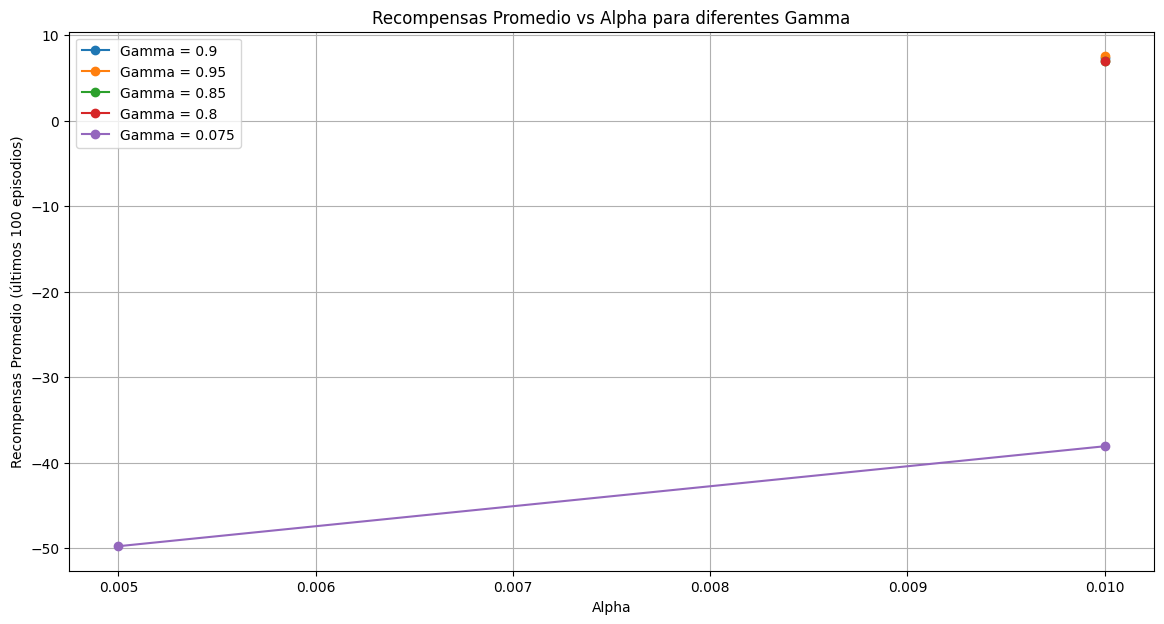

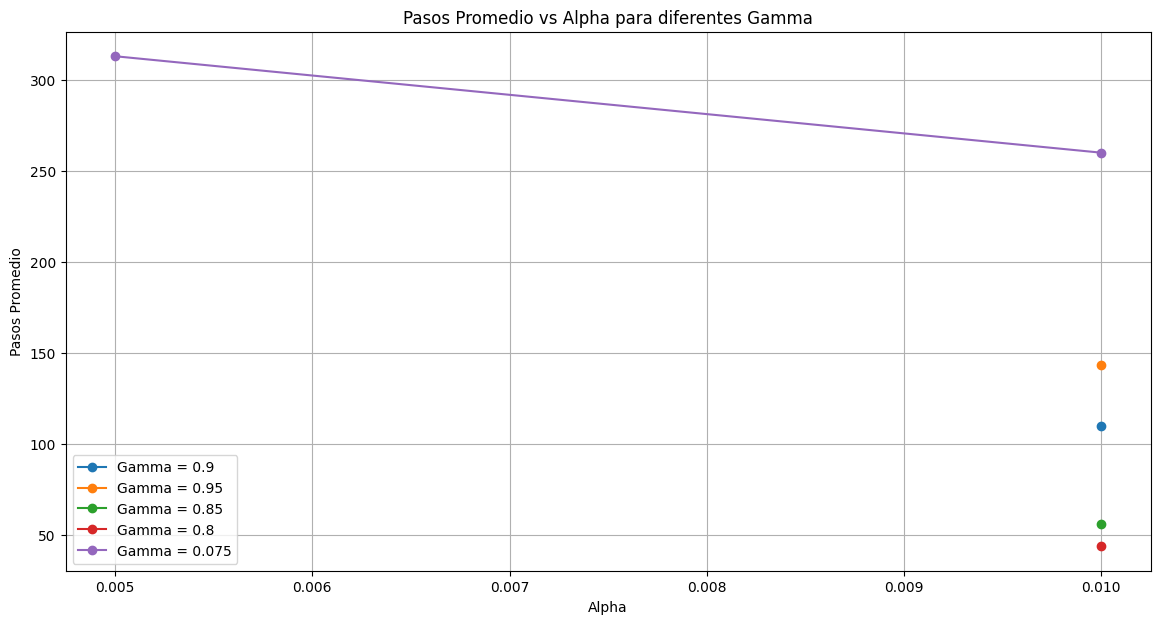

In [14]:
# Crear listas para recompensas promedio y pasos promedio por configuración
avg_rewards_vs_alpha = {}
avg_steps_vs_alpha = {}

# Obtener los valores únicos de gamma
unique_gammas = set(cfg['gamma'] for cfg in configx)
print(f"Valores únicos de gamma: {unique_gammas}")


# Iterar sobre los valores únicos de gamma y calcular métricas
for gamma in unique_gammas:
    avg_rewards_vs_alpha[gamma] = []
    avg_steps_vs_alpha[gamma] = []
    alphas = []

    for cfg in configx:
        if cfg['gamma'] == gamma:
            alphas.append(cfg['alpha'])
            rewards = results[cfg['name']]
            avg_reward = np.mean(rewards[-100:])  # Promedio de recompensas en los últimos 100 episodios
            avg_rewards_vs_alpha[gamma].append(avg_reward)

            # Calcular pasos promedio (aproximación basada en recompensas)
            avg_steps = cfg['max_steps'] - (np.mean(rewards) / (np.max(rewards) + 1e-5) * cfg['max_steps'])
            avg_steps_vs_alpha[gamma].append(avg_steps)

# Graficar recompensas promedio vs alpha para diferentes gamma
plt.figure(figsize=(14, 7))
for gamma, rewards in avg_rewards_vs_alpha.items():
    sorted_alphas, sorted_rewards = zip(*sorted(zip(alphas, rewards)))
    plt.plot(sorted_alphas, rewards, marker='o', label=f'Gamma = {gamma}')

plt.title('Recompensas Promedio vs Alpha para diferentes Gamma')
plt.xlabel('Alpha')
plt.ylabel('Recompensas Promedio (últimos 100 episodios)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar pasos promedio vs alpha para diferentes gamma
plt.figure(figsize=(14, 7))
for gamma, steps in avg_steps_vs_alpha.items():
    sorted_alphas, sorted_steps = zip(*sorted(zip(alphas, steps)))
    plt.plot(sorted_alphas, steps, marker='o', label=f'Gamma = {gamma}')

plt.title('Pasos Promedio vs Alpha para diferentes Gamma')
plt.xlabel('Alpha')
plt.ylabel('Pasos Promedio')
plt.legend()
plt.grid(True)
plt.show()



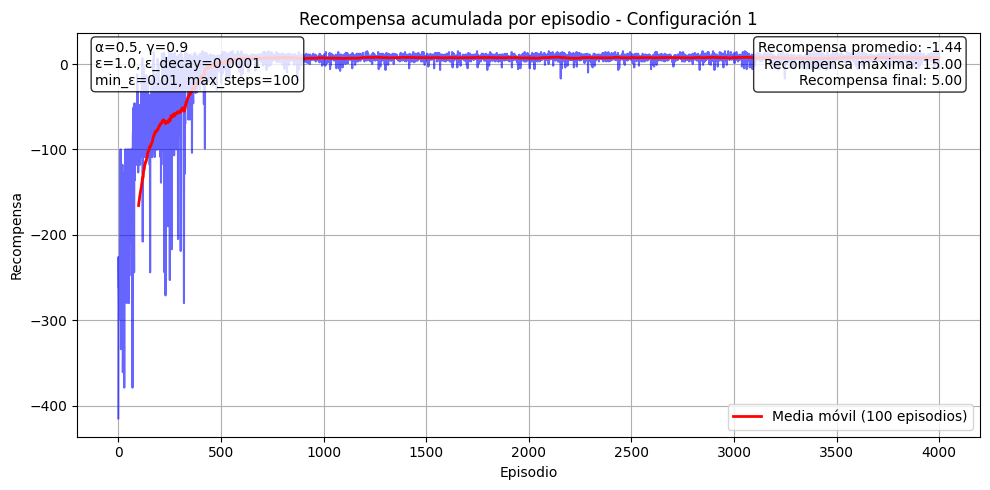

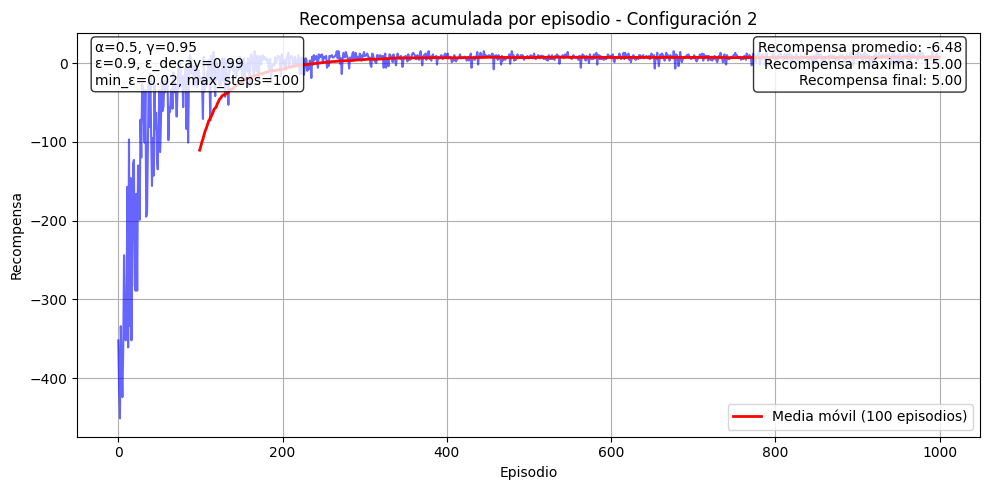

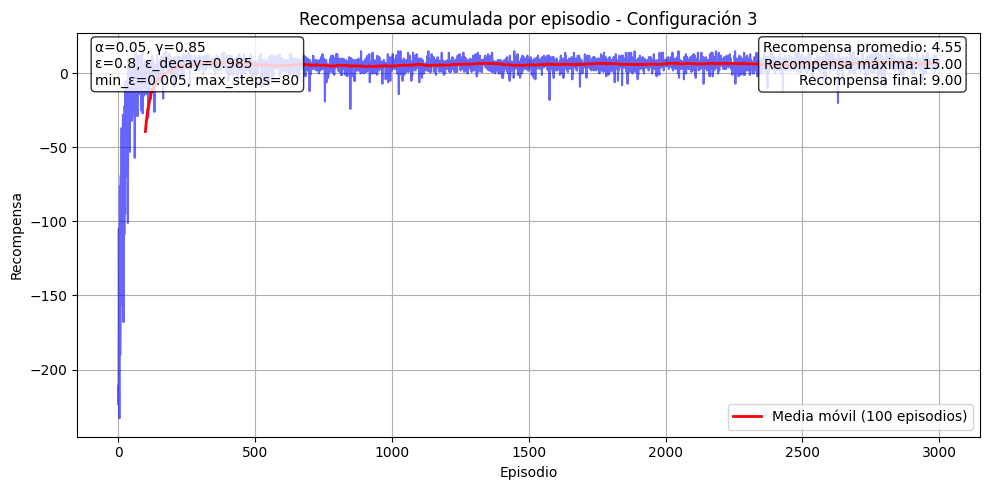

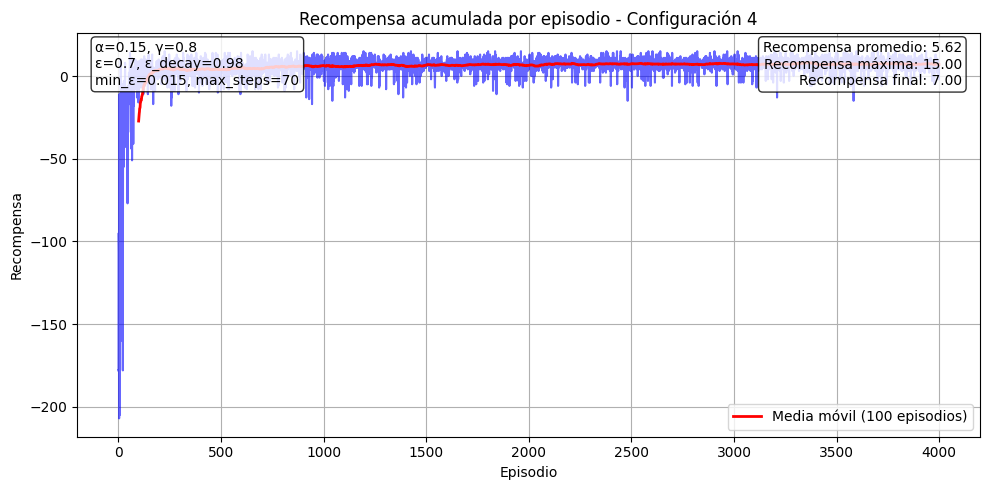

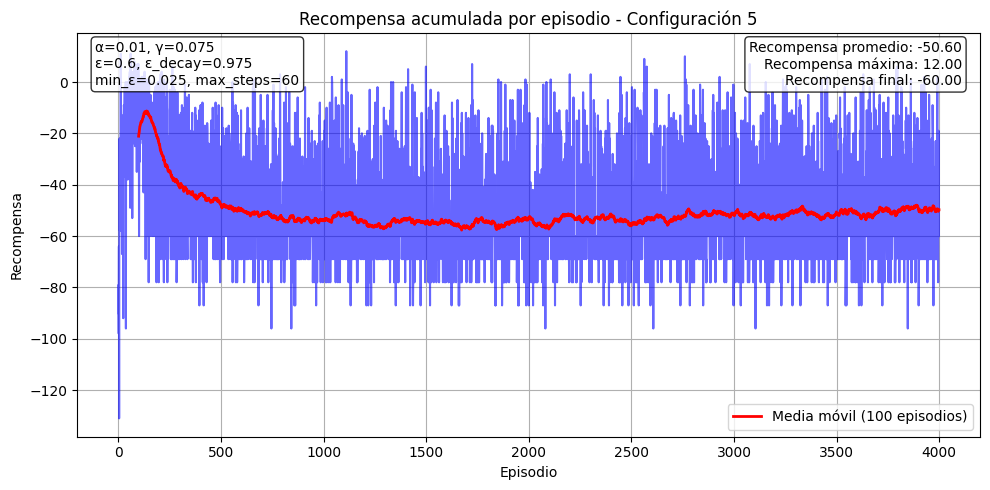

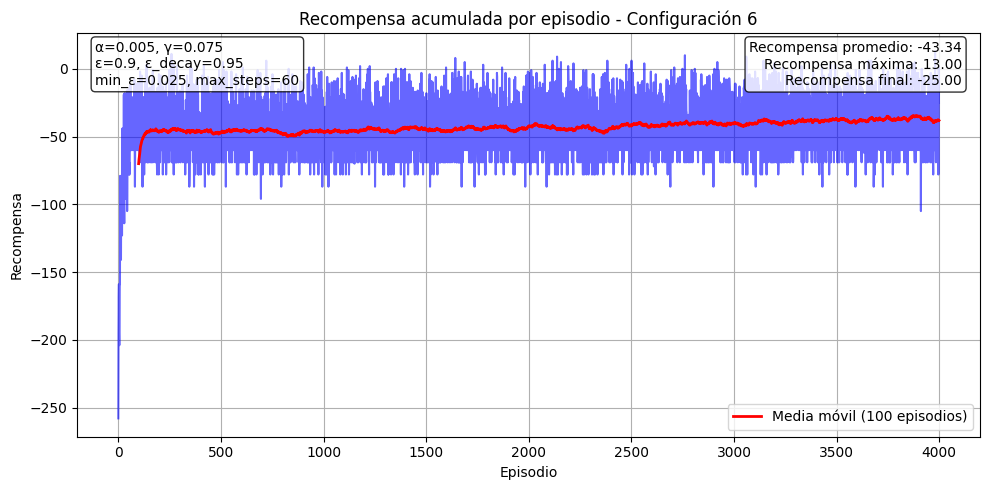

In [15]:
# Crear gráficas individuales para cada configuración
for config_name, rewards in results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, color='blue', alpha=0.6)

    # Añadir línea de tendencia (media móvil)
    window_size = 100
    moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    plt.plot(range(window_size-1, len(rewards)), moving_avg, color='red', linewidth=2,
             label=f'Media móvil ({window_size} episodios)')

    plt.title(f"Recompensa acumulada por episodio - Configuración {config_name}")
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa")
    plt.grid(True)
    plt.legend()

    # Buscar la configuración correspondiente (convertir config_name a entero)
    try:
        current_config = next(c for c in configx if c['name'] == int(config_name))
    except StopIteration:
        raise ValueError(f"No se encontró la configuración con el nombre {config_name} en 'config'.")

    # Crear texto con los parámetros
    param_text = (
        f"α={current_config['alpha']}, γ={current_config['gamma']}\n"
        f"ε={current_config['epsilon']}, ε_decay={current_config['epsilon_decay']}\n"
        f"min_ε={current_config['min_epsilon']}, max_steps={current_config['max_steps']}"
    )

    plt.text(0.02, 0.98, param_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Añadir estadísticas
    stats_text = (
        f"Recompensa promedio: {np.mean(rewards):.2f}\n"
        f"Recompensa máxima: {np.max(rewards):.2f}\n"
        f"Recompensa final: {rewards[-1]:.2f}"
    )

    plt.text(0.98, 0.98, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()


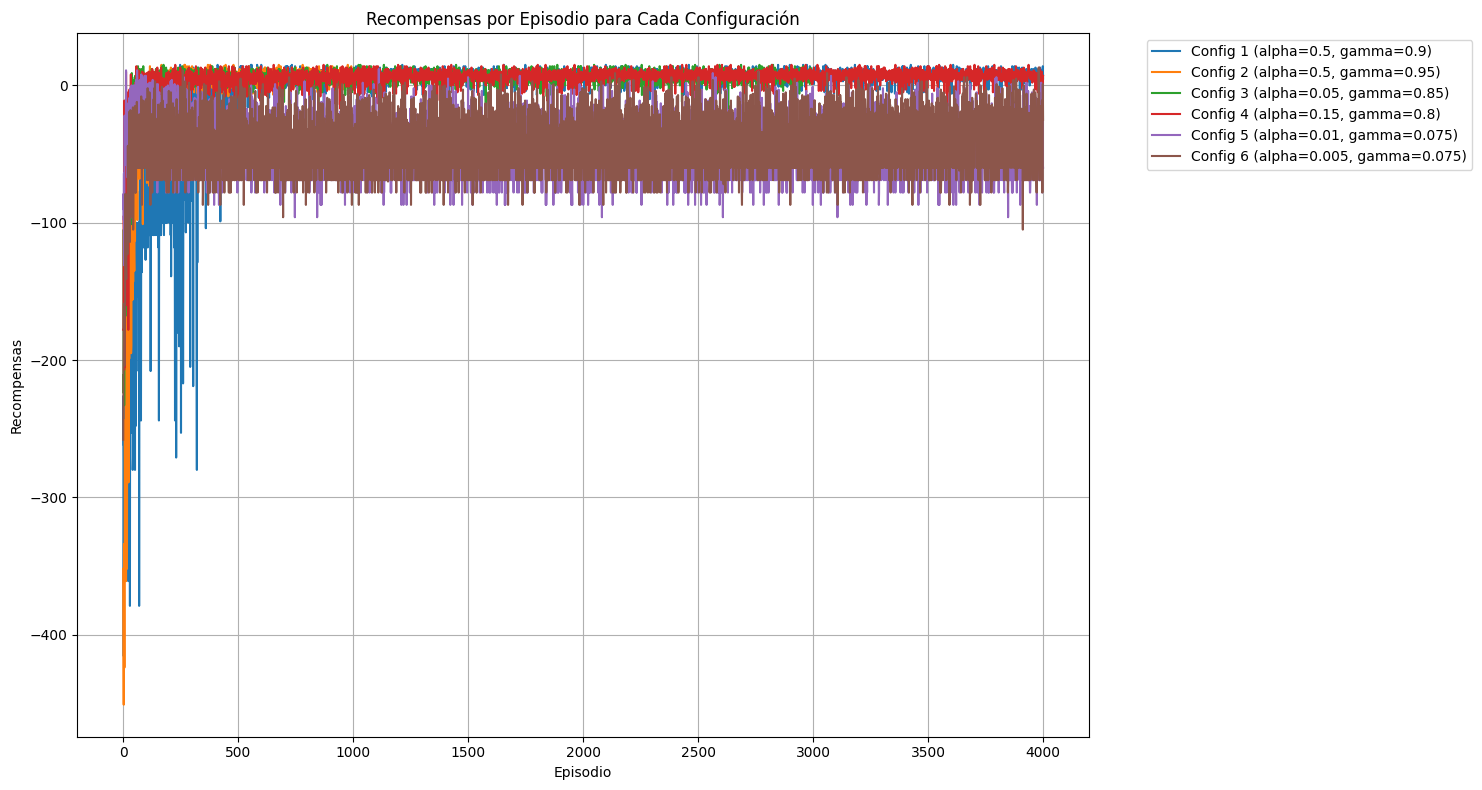

In [16]:
# Graficar recompensas por episodio para cada configuración
plt.figure(figsize=(15, 8))

for cfg in configx:
    rewards = results[cfg['name']]
    plt.plot(rewards, label=f"Config {cfg['name']} (alpha={cfg['alpha']}, gamma={cfg['gamma']})")

plt.title('Recompensas por Episodio para Cada Configuración')
plt.xlabel('Episodio')
plt.ylabel('Recompensas')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()  # Ajusta la gráfica para evitar solapamientos
plt.show()



---



**11.** La siguiente linea de codigo  **"q_table[324]"**, representa un array de valores Q asociados a todas las acciones posibles desde el estado 324 en el entorno de Taxi-v3. Cada valor en el array representa la calidad esperada (suma de recompensas futuras descontadas) de realizar una acción específica desde ese estado. Estos valores guían al agente para tomar decisiones que maximicen las recompensas a lo largo del tiempo.

In [17]:
q_table[324]

array([-5.9048609 , -2.62113916, -5.89523639, -6.02785682, -9.83920604,
       -9.75      ])

## Analisis
La Configuración 1 puede considerarse la mejor de las opciones proporcionadas porque sobresale en la métrica más importante para evaluar el desempeño: la recompensa promedio final (últimos 100 episodios).

Esta métrica mide el promedio de recompensas obtenidas en los últimos 100 episodios del entrenamiento. Es un buen indicador de:

- Estabilidad: Qué tan consistente es el agente al resolver la tarea después de haber aprendido.
- Convergencia: Qué tan bien el agente ha aprendido una política efectiva.

Si comparación con otras configuraciones:

- Configuración 2: 6.22 (-11.5%)
- Configuración 3: 6.76 (-3.8%)
- Configuración 4: 6.91 (-1.7%)
- Configuraciones 5 y 6 tienen recompensas negativas, lo que indica que el agente nunca aprendió una política útil para maximizar recompensas.

Si analizamos a mayor detalle cada parametro podemos inferir para la mejor configuración (configx 1)
- Tasa de Aprendizaje (alpha = 0.5): Un valor moderado permite actualizaciones significativas pero controladas de la tabla Q. Esto ayuda a aprender rápidamente sin sobrescribir excesivamente valores aprendidos previamente.
Configuraciones con valores de alpha más bajos, como la  configuración 3 (0.05), pueden tener dificultades para aprender rápidamente.
- Factor de Descuento (gamma = 0.9): Un valor alto (pero no extremo) prioriza recompensas futuras (No miope), incentivando al agente a buscar estrategias más largas pero efectivas. Por otro lado tenemos Configuraciones con valores de gamma bajos, como la 5 (0.075), penalizan excesivamente las recompensas futuras, lo que dificulta encontrar estrategias óptimas.
- Exploración y Decaimiento de Epsilon: El decaimiento controlado (epsilon_decay = 0.0001) asegura una transición gradual de la exploración a la explotación.
Configuraciones como la 4 (con epsilon_decay = 0.98) disminuyen demasiado rápido la exploración, lo que puede limitar la capacidad del agente para descubrir mejores políticas.
- Número de Episodios (num_episodes = 4000): Más episodios permiten al agente entrenarse lo suficiente para converger a una política estable.
Configuraciones con menos episodios, como la 2 (1000), podrían no ser suficientes para un aprendizaje completo.
- Pasos Máximos por Episodio (max_steps = 100): Este valor proporciona un buen equilibrio, permitiendo al agente explorar y optimizar sin restricciones excesivas. Configuraciones con menos pasos, como la 5 (60), limitan la capacidad del agente para explorar estados y aprender.

**12.** Habiendo realizado el entrenamiento, en las siguientes lineas de codigo  ejecutamos una simulación visual de un agente, específicamente utilizando la biblioteca Gym. Se simulan cinco episodios del entorno, mostrando visualmente los resultados de las acciones del agente, guiado por una política derivada de una tabla Q. para mayor informacion detallamos la secuencia:

  **Inicialización**: El entorno se reinicia con env.reset() al inicio de cada episodio, y la pantalla inicial se muestra utilizando plt.imshow() después de obtener la representación del entorno en modo 'rgb_array'.

  **Bucle de Episodios:** Se ejecutan los episodios donde:

  Al final de cada episodio, se imprime un mensaje indicando que el episodio ha concluido junto con el número de pasos realizados y la recompensa acumulada.
  Al finalizar los 5 episodios, se cierra el entorno con env.close() para liberar recursos.

  Finalmente la imagen  nos muestra la representación gráfica del estado final del entorno después de realizar una serie de acciones, mostrando el taxi y el entorno gráfico que podría representar las calles y ubicaciones relevantes.

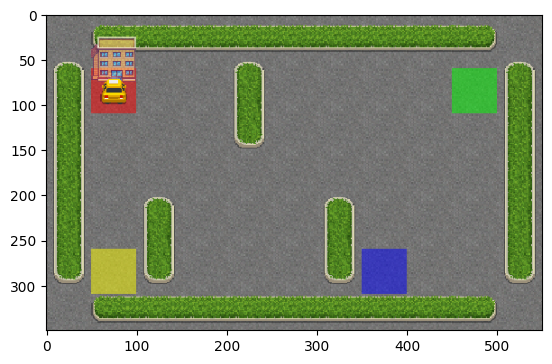

In [18]:
# Luego de evaluar la mejor configuración seleccionamos y realizamos la ejecución del agente con la siguiente Configuración seleccionada
alpha = 0.5
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.0001
min_epsilon = 0.01
num_episodes = 4000
max_steps = 100

# Inicializar la tabla Q con ceros
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Fase de Entrenamiento
for episode in range(num_episodes):
    reset_result = env.reset()
    if isinstance(reset_result, tuple):
        state, _ = reset_result
    else:
        state = reset_result

    done = False
    current_epsilon = max(min_epsilon, epsilon * (1 - epsilon_decay))  # Decaimiento de epsilon
    total_reward = 0

    for step in range(max_steps):
        # Política epsilon-greedy
        if np.random.uniform(0, 1) < current_epsilon:
            action = env.action_space.sample()  # Exploración
        else:
            action = np.argmax(q_table[state, :])  # Explotación

        # Tomar acción en el entorno
        step_result = env.step(action)
        if len(step_result) == 4:  # Soporte para versiones antiguas de Gym
            next_state, reward, done, info = step_result
            truncated = False
        else:  # Soporte para versiones modernas de Gym
            next_state, reward, done, truncated, info = step_result

        # Actualizar tabla Q
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

        # Actualizar estado y recompensas
        state = next_state
        total_reward += reward

        if done or truncated:
            break

    # Imprimir progreso cada 100 episodios
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}: Total Reward: {total_reward:.2f}")

# Fase de Ejecución (Código Original Modificado)
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for episode in range(5):  # Ejecutar 5 episodios con la política entrenada
    reset_result = env.reset()
    if isinstance(reset_result, tuple):
        state, _ = reset_result
    else:
        state = reset_result

    done = False
    print('Episode', episode)

    for step in range(max_steps):
        env.render(mode='rgb_array')
        action = np.argmax(q_table[state, :])  # Selección de acción óptima
        step_result = env.step(action)
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())
        time.sleep(1.5)

        if len(step_result) == 4:  # Para versiones antiguas de Gym
            next_state, reward, done, info = step_result
            truncated = False
        else:  # Para versiones modernas de Gym
            next_state, reward, done, truncated, info = step_result

        state = next_state
        if done or truncated:
            env.render(mode='rgb_array')
            print(f'Finished episode {episode} after {step} steps, with reward {reward}')
            break

ipythondisplay.clear_output(wait=True)
env.close()



---



13. Procedemos a comparar resultados en funcion a la variación de parámetros

| Nombre del Parámetro | Comentarios                          | Valor Actual | Valor 2 | Valor 3 | Valor 4 | Valor 5 |
|----------------------|--------------------------------------|--------------|---------|---------|---------|---------|
| alpha                | Tasa de aprendizaje                  | 0.5          | 0.2     | 0.05    | 0.15    | 0.01    |
| gamma                | Factor de descuento                  | 0.9          | 0.95    | 0.85    | 0.8     | 0.75    |
| epsilon              | Tasa inicial de exploración          | 1.0          | 0.9     | 0.8     | 0.7     | 0.6     |
| epsilon_decay        | Tasa de decaimiento de exploración   | 0.0001        | 0.99    | 0.985   | 0.980   | 0.975   |
| min_epsilon          | Tasa mínima de exploración           | 0.01         | 0.02    | 0.005   | 0.015   | 0.025   |
| num_episodes         | Número total de episodios            | 4000         | 1000    | 3000    | 4000    | 5000    |
| max_steps            | Máximo de pasos por episodio         | 100           | 100     | 80      | 70      | 60      |





---



## Conclusión
1. Se puede concluir que la configuración 1 es la mejor porque:
  - Maximiza la recompensa promedio final, el indicador clave del desempeño del agente.
  - Tiene parámetros bien equilibrados para la tasa de aprendizaje, el factor de descuento y la exploración.
  - Proporciona suficiente tiempo y flexibilidad para el entrenamiento.

2. Es importante considerar siempre la recompensa promedio final como la métrica principal, ya que refleja la estabilidad y convergencia del agente al final del proceso de aprendizaje.

3. Los hiperparámetros claves para evaluar son:
- Tasa de Aprendizaje (Alpha), que asegura equilibrio entre velocidad de aprendizaje y estabilidad.
- Factor de Descuento (Gamma),balance entre recompensas inmediatas y futuras.
- Probabilidad inicial de exploración, que influye en la capacidad del agente de descubrir políticas óptimas.


4. Se recomienda como ajuste:
- Monitorear la recompensa promedio en la etapa de entrenamiento
- Si el aprendizaje es inestable, entonces debenmos reducir Alpha





